In [1]:
from __future__ import annotations
try:
    from scripts_for_plotting import *
except ModuleNotFoundError:
    import sys
    sys.path.append('../')
    from scripts_for_plotting import *

import scienceplots
plt.style.use('science')
plt.style.use('notebook')
import ipyparallel as ipp

In [2]:
observed_path = "/media/advait/DATA/research/rcb-project/TSFitPy/input_files/observed_spectra"
star = "HD137613"
observed_file = f"{observed_path}/{star}.txt"
observed_data = np.loadtxt(observed_file, unpack=True)
obs_wave, obs_flux, obs_err = observed_data[0], observed_data[1], observed_data[2]

In [3]:
lists = {}
basepath = "../input_files/linelists/individual/"
lists['CN'] = basepath + "CN"
lists['12C16O'] = basepath + "12C16O"
lists['12C18O'] = basepath + "12C18O"
lists['C2'] = basepath + "C2"
lists['atoms'] = basepath + "atoms"

In [4]:
np.min(obs_wave)

np.float64(22549.7741)

In [7]:
turbospectrum_paths = {"turbospec_path": "../turbospectrum/exec-ifx/",  # change to /exec-gf/ if gnu compiler
                       "interpol_path": "../scripts/model_interpolators/",
                       "model_atom_path": "../input_files/nlte_data/model_atoms/",
                       "departure_file_path": "../input_files/nlte_data/",
                    #    "model_atmosphere_grid_path": "../input_files/test_model_atmospheres/",
                        "model_atmosphere_grid_path": "../input_files/hdc_model_atmospheres/",
                       "line_list_path": ""}

teff = 5500
logg = 0.5
met = 0.0
vmic = 6.5
lmin = np.min(obs_wave)
lmax = 2.5e4
# lmax = 22700
ldelta = 0.5
atmosphere_type = "1D"   # "1D" or "3D"
nlte_flag = False
elements_in_nlte = ["Fe", "Mg"]  # can choose several elements, used ONLY if nlte_flag = True
nguess = 9.426

element_abundances ={"H" : 7.5-12, "He" : 11.5-10.93, "C" : 9.5-8.56, "N" : nguess-7.98, "O" : 8.8-8.77, "Na" : 6.9-6.29}  # elemental abundances [X/Fe]; if not written solar scaled ones are used

rat = 0.55
free_isotopes = {"8.016" : rat/(1+rat), "8.017": 0.0, "8.018": 1/(1+rat)}
include_molecules = True  


In [8]:
turbospectrum_paths['line_list_path'] = lists['CN'] 
wavelength, syntflux_CN = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=0, rotation=0, do_matplotlib_plot=False)

turbospectrum_paths['line_list_path'] = lists['12C16O'] 
wavelength1, syntflux_CO16 = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=0, rotation=0, do_matplotlib_plot=False)

turbospectrum_paths['line_list_path'] = lists['12C18O'] 
wavelength2, syntflux_CO18 = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=0, rotation=0, do_matplotlib_plot=False)

turbospectrum_paths['line_list_path'] = lists['C2'] 
wavelength3, syntflux_C2 = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=0, rotation=0, do_matplotlib_plot=False)

turbospectrum_paths['line_list_path'] = lists['atoms'] 
wavelength4, syntflux_atoms = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=0, rotation=0, do_matplotlib_plot=False)

Trimming
Trimming done
Running TS
TS completed
Trimming
Trimming done
Running TS
TS completed
Trimming
Trimming done
Running TS
TS completed
Trimming
Trimming done
Running TS
TS completed
Trimming
Trimming done
Running TS
TS completed


In [9]:
turbospectrum_paths['line_list_path'] = "../input_files/linelists/linelist_4500K/"
wavelength, syntflux_all = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=0, rotation=0, do_matplotlib_plot=False)

# turbospectrum_paths['line_list_path'] = lists['C2'] 
# element_abundances ={"H" : 7.5-12, "He" : 11.5-10.93, "C" : 9.5-8.56 + 0.7, "N" : nguess-7.98, "O" : 8.8-8.77, "Na" : 6.9-6.29}  # elemental abundances [X/Fe]; if not written solar scaled ones are used
# wavelength3, syntflux_C2_high = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules,free_isotopes, resolution=75000, macro=0, rotation=0, do_matplotlib_plot=False)

Trimming
Trimming done
Running TS
TS completed


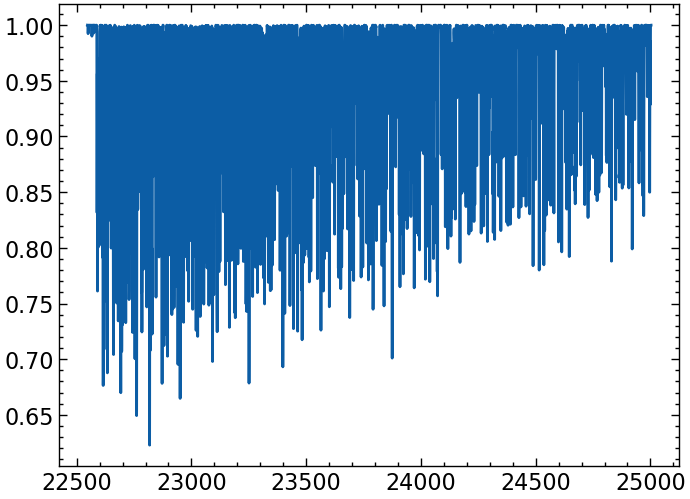

In [10]:
plt.plot(wavelength, syntflux_CN)

In [10]:
# np.savetxt(f"{observed_path}/{star}_CN_synthetic.txt", np.array([wavelength, syntflux_CN]).T)

In [11]:
lines = pd.read_csv("/media/advait/DATA/research/rcb-project/code/lineranges/atomic.csv")
lines['wav'] = lines['wav']*1e-4

In [12]:
wavecorr = obs_wave*1e-4
fluxcorr = obs_flux

In [13]:
n = 20

mask = wavecorr < 2.5
fluxcorr = fluxcorr[mask]
wavecorr = wavecorr[mask]
wavmin = np.min(wavecorr)
wavspan = np.max(wavecorr)-np.min(wavecorr)

for i in range(n):
    # i = 2
    fig, (axs, ax2) = plt.subplots(2, 1, figsize=(15, 8))
    plt.subplots_adjust(wspace=0, hspace=0)
    buffer = 0.0005
    wav_range = (wavmin + i/n*wavspan - buffer, wavmin + (i+1)/n*wavspan + buffer)
    mask = (wavecorr > wav_range[0]) & (wavecorr < wav_range[1])
    axs.set_xlim(wav_range)
    ax2.set_xlim(wav_range)
    axs.plot(wavecorr[mask], fluxcorr[mask], "k.-", lw = 1, alpha=0.75)
    # axs.plot(wavelength*1e-4, syntflux_CO16, lw = 2.5, c = 'xkcd:blue', alpha = 0.76, label = r"$^{12}$C$^{16}$O")
    # axs.plot(wavelength*1e-4, syntflux_CO18, lw = 2.5, c = 'xkcd:red', alpha = 0.76, label = r"$^{12}$C$^{18}$O")
    # axs.plot(wavelength*1e-4, syntflux_CN, lw = 2.5, c = 'xkcd:green', alpha = 0.76, label = "CN")
    axs.plot(wavelength*1e-4, syntflux_all, lw = 2.5, c = 'xkcd:azure', alpha = 0.9, label = r"full")
    # axs.plot(wavelength*1e-4, syntflux_C2_high, lw = 2.5, c = 'xkcd:purple', alpha = 0.76, label = r"C$_2$+ 0.7")
    # axs.plot(syntwave_CH*1e-4, syntflux_CH, lw = 2.5, c = 'xkcd:pink', alpha = 0.76, label = "CH")
    axs.plot(wavelength*1e-4, syntflux_atoms, lw = 1.5, c = 'xkcd:orange', alpha = 0.76, label = "Atoms")
    axs.set_ylim(0.4, 1.15)
    ax2.set_ylim(0.4, 1.15)
    axs.legend(fontsize=5, loc = 'upper right')
    axs.set_xticklabels([])
    # axs.grid(which='both', linestyle='--', alpha = 0.5)

    

    # find the lines in the range
    prev_wav = 0
    prev_name = ''
    for idx, row in lines.iterrows():
        near = False
        same = False

        if row['wav'] > wav_range[0] and row['wav'] < wav_range[1]:
            linewav = row['wav']
            # find nearest syntwave index to linewav
            idx = np.argmin(np.abs(wavelength*1e-4 - linewav))
            thresh = 0.95
            wav_gap_thresh = 1e-4
            if syntflux_atoms[idx] < thresh:
                near = abs(prev_wav - linewav) < wav_gap_thresh
                same = prev_name == row['name']
                if (not near) :
                    axs.axvline(row['wav'], color = 'xkcd:gray', linestyle='--', lw=1)
                    axs.text(row['wav']+5e-5, 1.05, row['name'], rotation = 90, fontsize = 10, fontname = 'serif')
                    ax2.axvline(row['wav'], color = 'xkcd:gray', linestyle='--', lw=1)
                    # ax2.text(row['wav']+5e-5, 1.15, row['name'], rotation = 90, fontsize = 10, fontname = 'serif')
                    prev_wav, prev_name = row['wav'], row['name']
                else:
                    print("too near")
    ax2.plot(wavecorr[mask], fluxcorr[mask], "k.-", lw = 1, alpha=0.75)
    ax2.plot(wavelength*1e-4, syntflux_CO16, lw = 2.5, c = 'xkcd:blue', alpha = 0.76, label = r"$^{12}$C$^{16}$O")
    ax2.plot(wavelength*1e-4, syntflux_CO18, lw = 2.5, c = 'xkcd:red', alpha = 0.76, label = r"$^{12}$C$^{18}$O")
    ax2.plot(wavelength*1e-4, syntflux_CN, lw = 2.5, c = 'xkcd:green', alpha = 0.76, label = "CN")
    ax2.plot(wavelength*1e-4, syntflux_C2, lw = 2.5, c = 'xkcd:purple', alpha = 0.76, label = r"C$_2$")
    # 2xs.plot(syntwave_CH*1e-4, syntflux_CH, lw = 2.5, c = 'xkcd:pink', alpha = 0.76, label = "CH")
    ax2.plot(wavelength*1e-4, syntflux_atoms, lw = 2.5, c = 'xkcd:orange', alpha = 0.76, label = "Atoms")
    ax2.legend(fontsize=5, loc = 'upper right')

    

    # save the plot
    plt.savefig(f'/media/advait/DATA/research/rcb-project/code/lineranges_new/{i}.png', dpi=300)
    # break
    plt.close()
    # axs.close()
    # axs[i].axhline(1.0, color = 'black', lw = 0.5)


too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near


In [102]:
n = 20

mask = wavecorr < 2.5
fluxcorr = fluxcorr[mask]
wavecorr = wavecorr[mask]
wavmin = np.min(wavecorr)
wavspan = np.max(wavecorr)-np.min(wavecorr)

for i in range(n):
    # i = 2
    fig, axs = plt.subplots(1, 1, figsize=(15, 4))
    buffer = 0.0005
    wav_range = (wavmin + i/n*wavspan - buffer, wavmin + (i+1)/n*wavspan + buffer)
    axs.set_xlim(wav_range)
    mask = (wavecorr > wav_range[0]) & (wavecorr < wav_range[1])
    axs.plot(wavecorr[mask], fluxcorr[mask], 'k', lw = 1)
    # axs.plot(wavelength*1e-4, syntflux_CO16, lw = 2.5, c = 'xkcd:blue', alpha = 0.76, label = r"$^{12}$C$^{16}$O")
    # axs.plot(wavelength*1e-4, syntflux_CO18, lw = 2.5, c = 'xkcd:red', alpha = 0.76, label = r"$^{12}$C$^{18}$O")
    # axs.plot(wavelength*1e-4, syntflux_CN, lw = 2.5, c = 'xkcd:green', alpha = 0.76, label = "CN")
    axs.plot(wavelength*1e-4, syntflux_all, lw = 2.5, c = 'xkcd:gray', alpha = 0.76, label = r"full")
    axs.plot(wavelength*1e-4, syntflux_C2_high, lw = 2.5, c = 'xkcd:purple', alpha = 0.76, label = r"C$_2$+ 0.7")
    # axs.plot(syntwave_CH*1e-4, syntflux_CH, lw = 2.5, c = 'xkcd:pink', alpha = 0.76, label = "CH")
    # axs.plot(wavelength*1e-4, syntflux_atoms, lw = 2.5, c = 'xkcd:orange', alpha = 0.76, label = "Atoms")
    axs.set_ylim(0.4, 1.25)
    axs.legend(fontsize=5, loc = 'upper right')
    # axs.grid(which='both', linestyle='--', alpha = 0.5)

    # find the lines in the range
    prev_wav = 0
    prev_name = ''
    for idx, row in lines.iterrows():
        near = False
        same = False

        if row['wav'] > wav_range[0] and row['wav'] < wav_range[1]:
            linewav = row['wav']
            # find nearest syntwave index to linewav
            idx = np.argmin(np.abs(wavelength*1e-4 - linewav))
            thresh = 0.95
            wav_gap_thresh = 1e-4
            if syntflux_atoms[idx] < thresh:
                near = abs(prev_wav - linewav) < wav_gap_thresh
                same = prev_name == row['name']
                if (not near) :
                    axs.axvline(row['wav'], color = 'xkcd:gray', linestyle='--', lw=1)
                    axs.text(row['wav']+5e-5, 1.15, row['name'], rotation = 90, fontsize = 10, fontname = 'serif')
                    prev_wav, prev_name = row['wav'], row['name']
                else:
                    print("too near")

    

    # save the plot
    plt.savefig(f'/media/advait/DATA/research/rcb-project/code/lineranges_new/fullC2_{i}.png', dpi=300)
    # break
    plt.close()
    # axs.close()
    # axs[i].axhline(1.0, color = 'black', lw = 0.5)


too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near
too near


: 